In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications import vgg16
from keras.applications import vgg19
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import ResNet101

In [2]:
num_classes = 5
image_size = 224

In [3]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
trainDir = '/content/drive/MyDrive/crop data/crop train'
train_set = data_generator.flow_from_directory(
    trainDir,
    target_size=(image_size, image_size),
    batch_size=200,
    class_mode='categorical'
    )

Found 325 images belonging to 5 classes.


In [5]:
x_train, y_train = next(train_set)
len(x_train)

200

In [7]:
testDir = '/content/drive/MyDrive/crop data/crop test'
test_set = data_generator.flow_from_directory(
    testDir,
    target_size=(image_size, image_size),
    batch_size=20,
    class_mode='categorical'
    )

Found 81 images belonging to 5 classes.


In [8]:
x_test, y_test = next(test_set)
len(x_test)

20

In [9]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (200, 224, 224, 3)
y_train (200, 5)
x_test (20, 224, 224, 3)
y_test (20, 5)


In [10]:
model = Sequential()
model.add(vgg16.VGG16(include_top=False, pooling='avg', weights='imagenet',))

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
model.add(Dense(num_classes,activation='softmax'))
model.layers[0].layers

In [11]:
# 증강 x (crop data vgg16)
model.compile(loss='categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics=['accuracy'])
hist=model.fit(x_train, y_train, batch_size=50, epochs=10, validation_split=0.3)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
3/3 [==============================] - 271s 91s/step - loss: 55.7449 - accuracy: 0.2857 - val_loss: 78.4298 - val_accuracy: 0.0333
Epoch 2/10
3/3 [==============================] - 273s 93s/step - loss: 117.5299 - accuracy: 0.2357 - val_loss: 1.4859 - val_accuracy: 0.2333
Epoch 3/10
3/3 [==============================] - 264s 90s/step - loss: 1.4797 - accuracy: 0.2143 - val_loss: 2.9465 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 266s 90s/step - loss: 5.4379 - accuracy: 0.2357 - val_loss: 1.4258 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 271s 91s/step - loss: 1.4567 - accuracy: 0.3286 - val_loss: 1.9295 - val_accuracy: 0.2333
Epoch 6/10
3/3 [==============================] - 264s 90s/step - loss: 1.5457 - accuracy: 0.3000 - val_loss: 1.3646 - val_accuracy: 0.3333
Epoch 7/10
3/3 [==============================] - 270s 91s/step - loss: 1.4510 - accuracy: 0.2357 - val_loss: 1.3918 - val_accuracy: 0.2333
Epoch 8/10
3/3 [

In [ ]:
res = model.evaluate(x_train, y_train)
print(f'정확도={res[1]*100:.1f}%')

In [ ]:
res = model.evaluate(x_test, y_test)
print(f'정확도={res[1]*100:.1f}%')

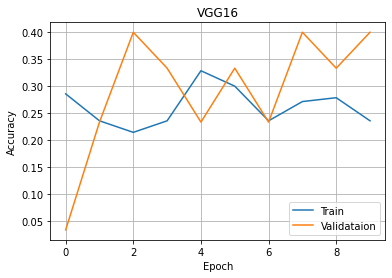

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('VGG16')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [11]:
model5 = Sequential()
model5.add(vgg19.VGG19(include_top=False, pooling='avg', weights='imagenet',))

80134624/80134624 [==============================] - 0s 0us/step


In [12]:
model5.add(Dense(num_classes,activation='softmax'))
model5.layers[0].layers

In [13]:
# 증강 x (crop data vgg19)
model5.compile(loss='categorical_crossentropy',
            optimizer = Adam(lr=0.001),
            metrics=['accuracy'])
hist1=model5.fit(x_train, y_train, batch_size=50, epochs=10, validation_split=0.3)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 252s 86s/step - loss: 658.9071 - accuracy: 0.1929 - val_loss: 10.0003 - val_accuracy: 0.3167
Epoch 2/10
3/3 [==============================] - 250s 85s/step - loss: 5.0412 - accuracy: 0.3071 - val_loss: 1.9463 - val_accuracy: 0.3167
Epoch 3/10
3/3 [==============================] - 258s 89s/step - loss: 4.8393 - accuracy: 0.2857 - val_loss: 3.2409 - val_accuracy: 0.3167
Epoch 4/10
3/3 [==============================] - 257s 88s/step - loss: 2.2295 - accuracy: 0.3000 - val_loss: 1.5249 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 263s 91s/step - loss: 1.5143 - accuracy: 0.2929 - val_loss: 1.4973 - val_accuracy: 0.3500
Epoch 6/10
3/3 [==============================] - 256s 87s/step - loss: 1.6619 - accuracy: 0.3071 - val_loss: 1.5210 - val_accuracy: 0.3167
Epoch 7/10
3/3 [==============================] - 253s 87s/step - loss: 1.4729 - accuracy: 0.3214 - val_loss: 1.2512 - val_accuracy: 0.3167
Epoch 8/10
3/3 [============

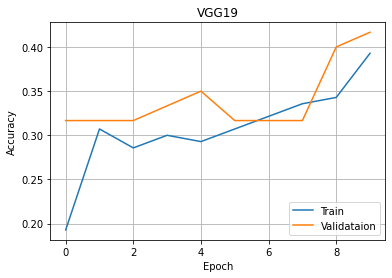

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('VGG19')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [25]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [26]:
# ResNet50 모델 선언
model1 = ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=5) # 클래스는 맞춰서 변경요망

In [27]:
# ResNet50 모델 학습 및 구현(crop data)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
hist2 = model1.fit(x_train,y_train,batch_size=100, epochs=10, validation_split=(0.3))

Epoch 1/10
2/2 [==============================] - 105s 34s/step - loss: 5.0706 - accuracy: 0.0500 - val_loss: 9.9058 - val_accuracy: 0.5167
Epoch 2/10
2/2 [==============================] - 103s 36s/step - loss: 3.8692 - accuracy: 0.4071 - val_loss: 26.3719 - val_accuracy: 0.2167
Epoch 3/10
2/2 [==============================] - 96s 33s/step - loss: 3.0259 - accuracy: 0.3714 - val_loss: 11.3402 - val_accuracy: 0.0667
Epoch 4/10
2/2 [==============================] - 97s 33s/step - loss: 3.0387 - accuracy: 0.4214 - val_loss: 10.1678 - val_accuracy: 0.0667
Epoch 5/10
2/2 [==============================] - 98s 35s/step - loss: 1.0935 - accuracy: 0.6143 - val_loss: 13.2665 - val_accuracy: 0.0667
Epoch 6/10
2/2 [==============================] - 96s 33s/step - loss: 0.7221 - accuracy: 0.7643 - val_loss: 12.5242 - val_accuracy: 0.0667
Epoch 7/10
2/2 [==============================] - 97s 33s/step - loss: 0.7357 - accuracy: 0.7929 - val_loss: 13.5829 - val_accuracy: 0.2000
Epoch 8/10
2/2 [===

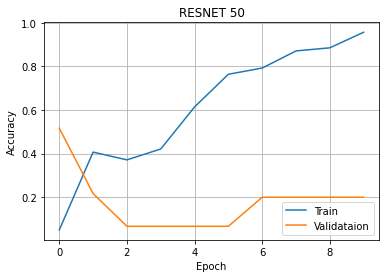

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('RESNET 50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()

In [15]:
# resnet101
model2 = ResNet101(include_top=True, weights=None, input_shape=(224, 224, 3), pooling=max, classes=5) # 클래스는 맞춰서 변경요망

In [16]:
# ResNet 101 모델 학습 및 구현(crop data)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
hist3 = model2.fit(x_train,y_train,batch_size=50, epochs=10, validation_split=(0.3))

Epoch 1/10
3/3 [==============================] - 164s 47s/step - loss: 4.5001 - accuracy: 0.3071 - val_loss: 9178.1260 - val_accuracy: 0.3167
Epoch 2/10
3/3 [==============================] - 135s 46s/step - loss: 2.8913 - accuracy: 0.3214 - val_loss: 33235.8242 - val_accuracy: 0.3167
Epoch 3/10
3/3 [==============================] - 133s 45s/step - loss: 1.2157 - accuracy: 0.4714 - val_loss: 80639.8047 - val_accuracy: 0.3167
Epoch 4/10
3/3 [==============================] - 131s 44s/step - loss: 0.8010 - accuracy: 0.6714 - val_loss: 94320.4062 - val_accuracy: 0.3167
Epoch 5/10
3/3 [==============================] - 137s 47s/step - loss: 0.5331 - accuracy: 0.8143 - val_loss: 133190.3438 - val_accuracy: 0.3167
Epoch 6/10
3/3 [==============================] - 135s 45s/step - loss: 0.3932 - accuracy: 0.8857 - val_loss: 51421.5430 - val_accuracy: 0.3167
Epoch 7/10
3/3 [==============================] - 130s 44s/step - loss: 0.3633 - accuracy: 0.9214 - val_loss: 24766.5117 - val_accuracy:

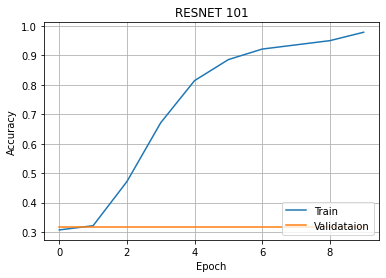

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('RESNET 101')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validataion'], loc = 'lower right')
plt.grid()
plt.show()